In [1]:
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'
data_dir = '/Users/iaincarmichael/data/courtlistener/'

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import cPickle as pickle
from collections import Counter
import pandas as pd

# graph package
import igraph as ig

# our code
sys.path.append(repo_directory + 'code/')
from setup_data_dir import setup_data_dir, make_subnetwork_directory
from pipeline.download_data import download_bulk_resource, download_master_edgelist, download_scdb
from helpful_functions import case_info
from viz import print_describe
from stats.linear_model import *

sys.path.append(repo_directory + 'vertex_metrics_experiment/code/')

from custom_vertex_metrics import *


# which network to download data for
network_name = 'federal' # 'federal', 'ca1', etc


# some sub directories that get used
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'


# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

# text length vs outdegree

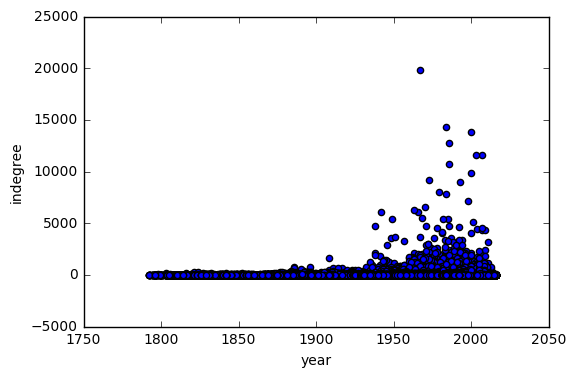

In [4]:
indegrees = G.indegree()
years = G.vs['year']

plt.scatter(years, indegrees)
plt.xlabel('year')
plt.ylabel('indegree')

In [5]:
def get_year_aggregate(years, x, fcn):
    by_year = {y: [] for y in set(years)}
    for i in range(len(years)):
        by_year[years[i]].append(x[i])
    
    year_agg_dict = {y: fcn(by_year[y]) for y in by_year.keys()}
    return pd.Series(year_agg_dict)

in_year_mean = get_year_aggregate(years, indegrees, np.median)

(1800, 2016)

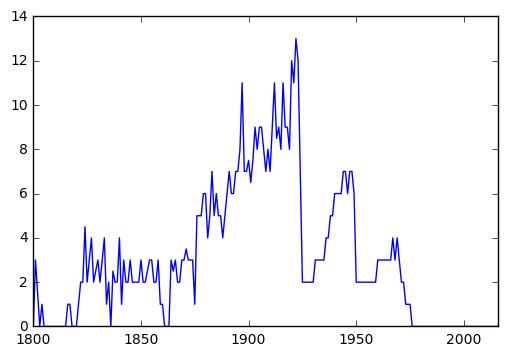

In [7]:
plt.plot(in_year_mean.index, in_year_mean)
plt.xlim([1800, 2016])

In [8]:
in_year_mean

1792.0    0.0
1793.0    1.0
1794.0    2.0
1795.0    0.0
1796.0    0.0
1797.0    0.0
1798.0    0.0
1799.0    0.0
1800.0    0.0
1801.0    3.0
1803.0    0.0
1804.0    1.0
1805.0    0.0
1806.0    0.0
1807.0    0.0
1808.0    0.0
1809.0    0.0
1810.0    0.0
1812.0    0.0
1813.0    0.0
1814.0    0.0
1815.0    0.0
1816.0    1.0
1817.0    1.0
1818.0    0.0
1819.0    0.0
1820.0    0.0
1821.0    1.0
1822.0    2.0
1823.0    2.0
         ... 
1987.0    0.0
1988.0    0.0
1989.0    0.0
1990.0    0.0
1991.0    0.0
1992.0    0.0
1993.0    0.0
1994.0    0.0
1995.0    0.0
1996.0    0.0
1997.0    0.0
1998.0    0.0
1999.0    0.0
2000.0    0.0
2001.0    0.0
2002.0    0.0
2003.0    0.0
2004.0    0.0
2005.0    0.0
2006.0    0.0
2007.0    0.0
2008.0    0.0
2009.0    0.0
2010.0    0.0
2011.0    0.0
2012.0    0.0
2013.0    0.0
2014.0    0.0
2015.0    0.0
2016.0    0.0
dtype: float64

In [9]:
indegrees

[67,
 53,
 282,
 4,
 13,
 1,
 45,
 4,
 42,
 41,
 31,
 58,
 2,
 21,
 40,
 78,
 11,
 37,
 23,
 10,
 13,
 68,
 1851,
 65,
 48,
 3,
 16,
 24,
 43,
 1,
 4,
 13,
 3,
 10,
 12,
 0,
 1,
 11,
 20,
 5,
 4,
 3,
 3,
 29,
 17,
 6,
 5,
 33,
 15,
 18,
 6,
 8,
 10,
 14,
 26,
 99,
 59,
 7,
 10,
 5,
 87,
 14,
 2,
 4,
 170,
 146,
 118,
 0,
 6,
 5,
 3,
 35,
 81,
 67,
 0,
 6,
 2,
 3,
 14,
 1,
 1,
 18,
 10,
 0,
 100,
 33,
 7,
 15,
 15,
 6,
 14,
 0,
 4,
 0,
 16,
 17,
 8,
 0,
 11,
 26,
 0,
 0,
 1,
 6,
 4,
 0,
 2,
 22,
 4,
 1,
 0,
 7,
 1,
 167,
 7,
 121,
 73,
 0,
 117,
 23,
 1,
 2,
 10,
 11,
 0,
 2,
 5,
 4,
 2,
 0,
 6,
 264,
 0,
 563,
 25,
 14,
 199,
 246,
 196,
 216,
 19,
 5,
 287,
 56,
 1018,
 203,
 27,
 54,
 168,
 74,
 1,
 12,
 28,
 44,
 17,
 10,
 13,
 26,
 60,
 10,
 2,
 0,
 0,
 71,
 8,
 56,
 70,
 91,
 1197,
 81,
 0,
 85,
 6,
 2,
 25,
 22,
 4,
 9,
 7,
 7,
 2,
 12,
 1813,
 6,
 9,
 49,
 0,
 9,
 14,
 63,
 21,
 5,
 18,
 1,
 0,
 7,
 5,
 1,
 7,
 12,
 9,
 1,
 94,
 39,
 190,
 17,
 98,
 27,
 51,
 40,
 34,
 9,
 55,
 

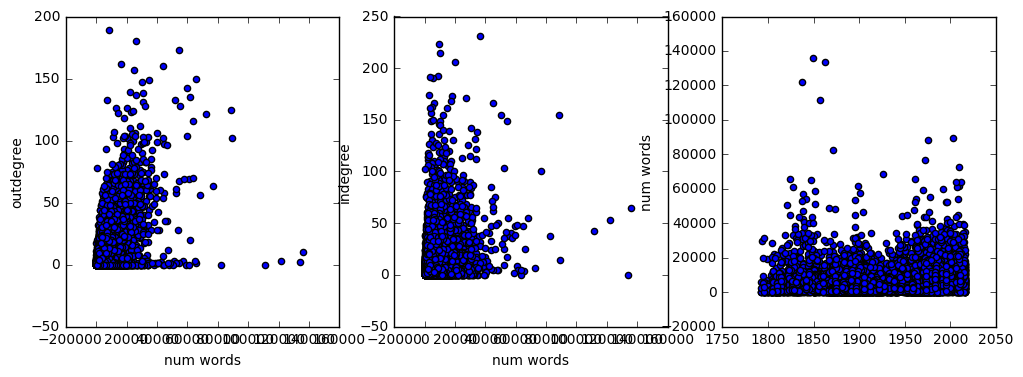

In [14]:
plt.figure(figsize=[12, 4])

plt.subplot(1,3,1)
plt.scatter(num_words, outdegrees)
plt.xlabel('num words')
plt.ylabel('outdegree')

plt.subplot(1,3,2)
plt.scatter(num_words, indegrees)
plt.xlabel('num words')
plt.ylabel('indegree')

plt.subplot(1,3,3)
plt.scatter(years, num_words)
plt.ylabel('year')
plt.ylabel('num words')


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.591e+04
Date:                Sat, 18 Feb 2017   Prob (F-statistic):               0.00
Time:                        15:14:21   Log-Likelihood:            -1.0368e+05
No. Observations:               27885   AIC:                         2.074e+05
Df Residuals:                   27883   BIC:                         2.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.9941      0.078     25.439      0.0

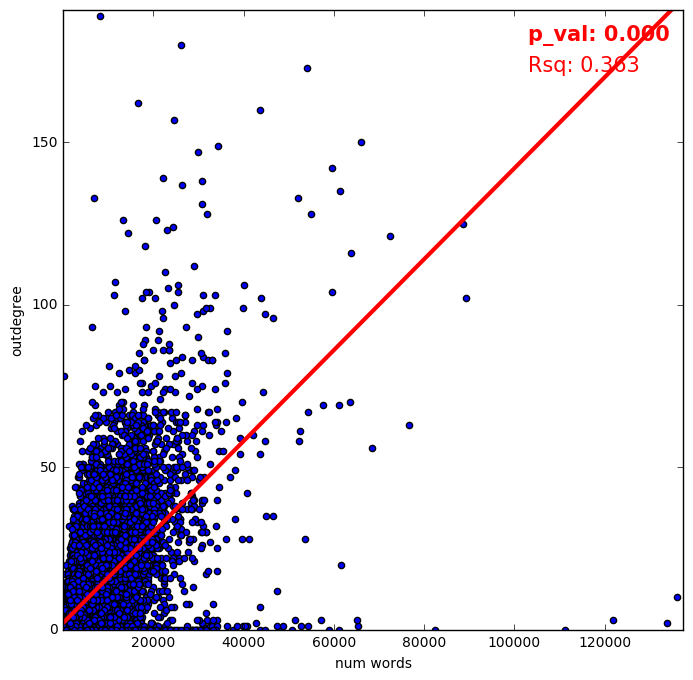

In [15]:
get_SLR(num_words, outdegrees, xlabel='num words', ylabel='outdegree')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                 1.595e+04
Date:                Sat, 18 Feb 2017   Prob (F-statistic):               0.00
Time:                        15:14:23   Log-Likelihood:                -95606.
No. Observations:               27435   AIC:                         1.912e+05
Df Residuals:                   27433   BIC:                         1.912e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2585      0.069     18.171      0.0

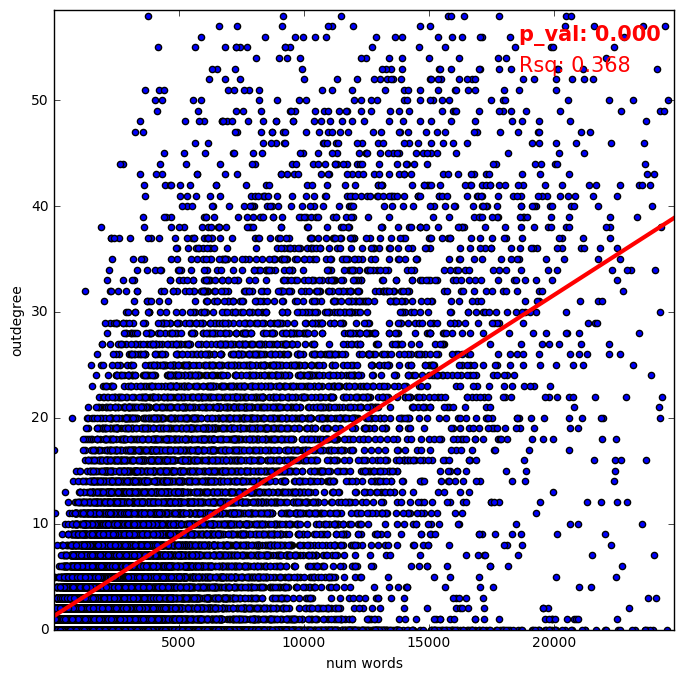

In [16]:
# remove cases with extremes
out_deg_upper = np.percentile(outdegrees, 99)
out_deg_lower = np.percentile(outdegrees, 0)

num_words_upper = np.percentile(num_words, 99)
num_words_lower = np.percentile(num_words, 0)

od_to_keep = (out_deg_lower <= outdegrees) & (outdegrees <= out_deg_upper)
nw_to_keep = (num_words_lower <= num_words) & (num_words <= num_words_upper)
to_keep =  od_to_keep & nw_to_keep

# remove cases that have zero out-degree
get_SLR(num_words[to_keep], outdegrees[to_keep], xlabel='num words', ylabel='outdegree')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3944.
Date:                Sat, 18 Feb 2017   Prob (F-statistic):               0.00
Time:                        15:14:24   Log-Likelihood:            -1.1029e+05
No. Observations:               27885   AIC:                         2.206e+05
Df Residuals:                   27883   BIC:                         2.206e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.3593      0.099     43.888      0.0

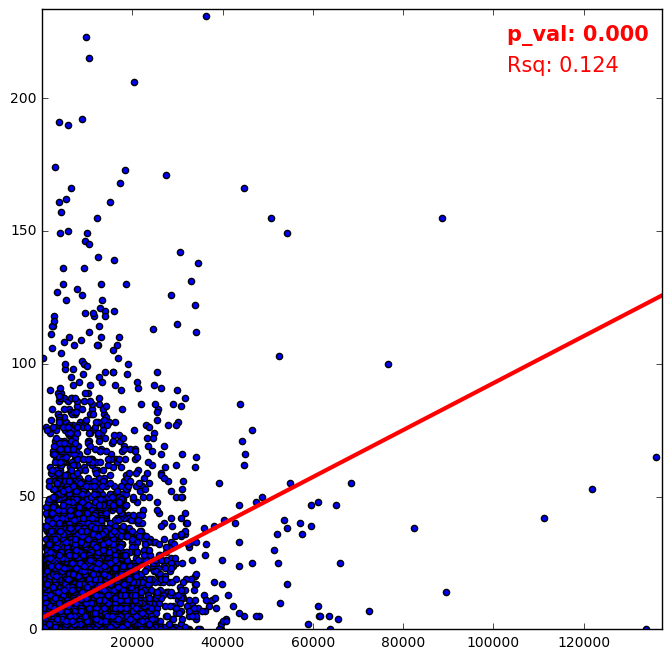

In [17]:
get_SLR(num_words, indegrees)

# text length over time

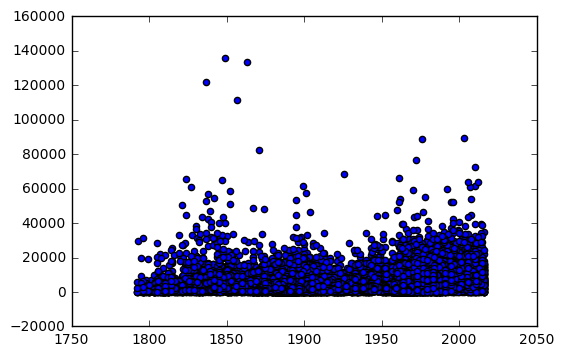

In [18]:
plt.scatter(years, num_words)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1828.
Date:                Sat, 18 Feb 2017   Prob (F-statistic):               0.00
Time:                        15:14:28   Log-Likelihood:            -2.7821e+05
No. Observations:               27885   AIC:                         5.564e+05
Df Residuals:                   27883   BIC:                         5.564e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -4.86e+04   1244.086    -39.067      0.0

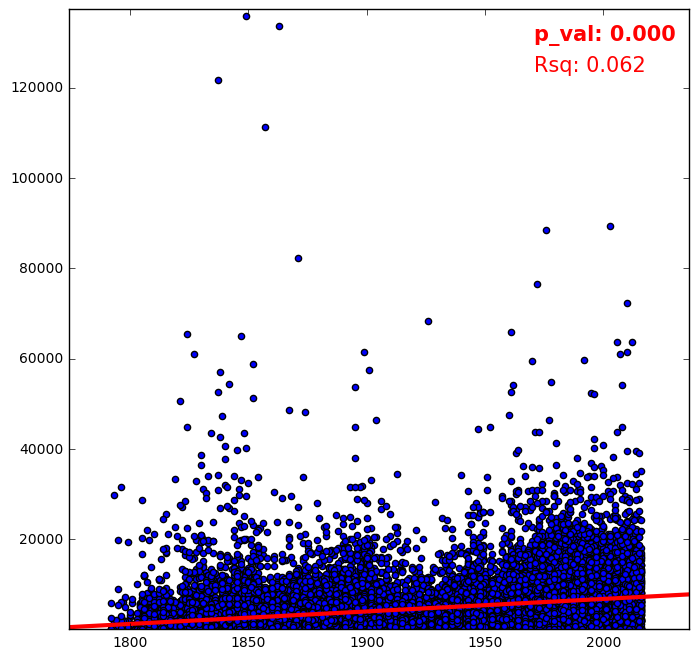

In [19]:
get_SLR(years, num_words)

In [20]:
def get_year_aggregate(years, x, fcn):
    by_year = {y: [] for y in set(years)}
    for i in range(len(years)):
        by_year[years[i]].append(x[i])
    
    year_agg_dict = {y: fcn(by_year[y]) for y in by_year.keys()}
    return pd.Series(year_agg_dict)

in_year_median = get_year_aggregate(years, indegrees, np.median)

nw_year_median = get_year_aggregate(years, num_words, np.median)

od_year_median = get_year_aggregate(years, outdegrees, np.median)

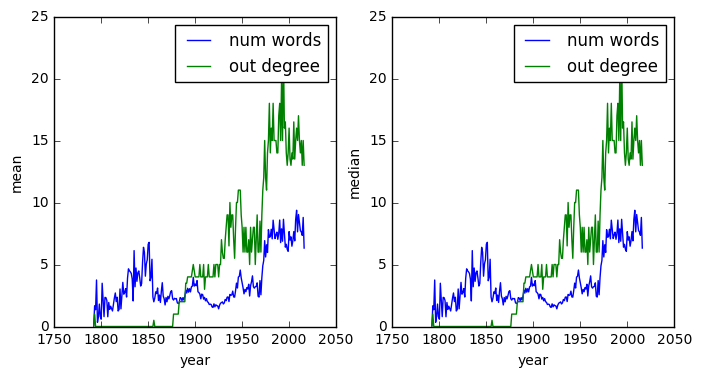

In [24]:
plt.figure(figsize=[8, 4])
plt.subplot(1,2,1)
plt.plot(nw_year_median.index, nw_year_median/1000, label='num words')
plt.plot(od_year_median.index, od_year_median, label='out degree')
plt.ylabel('mean')
plt.xlabel('year')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(nw_year_median.index, nw_year_median/1000, label='num words')
plt.plot(od_year_median.index, od_year_median, label='out degree')

plt.ylabel('median')
plt.xlabel('year')
plt.legend(loc='upper right')

(0, 30)

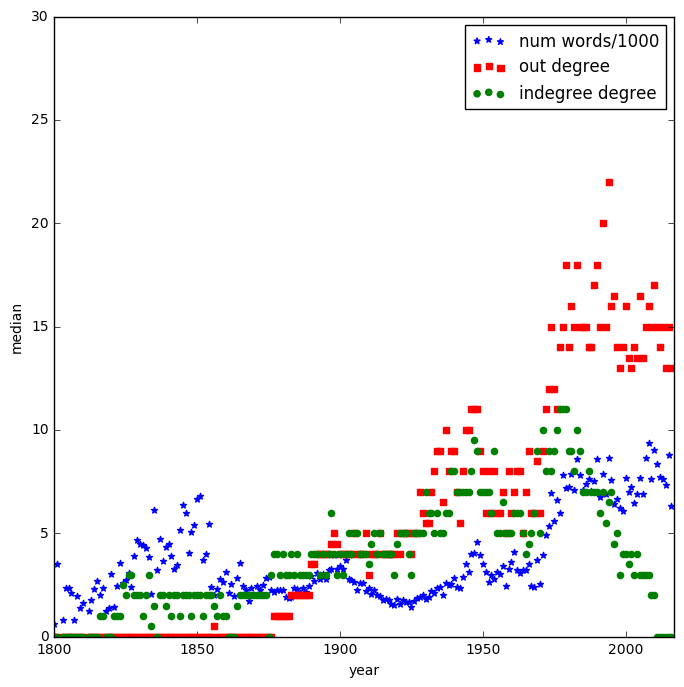

In [28]:
plt.figure(figsize=[8, 8])
plt.scatter(nw_year_median.index, nw_year_median/1000,
            label='num words/1000', color='blue', marker='*')
plt.scatter(od_year_median.index, od_year_median,
            label='out degree',  color='red', marker='s')
plt.scatter(in_year_median.index, in_year_median,
            label='indegree degree',  color='green', marker='o')
plt.ylabel('median')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.xlim([1800, 2017])
plt.ylim([0, 30])


(0, 30)

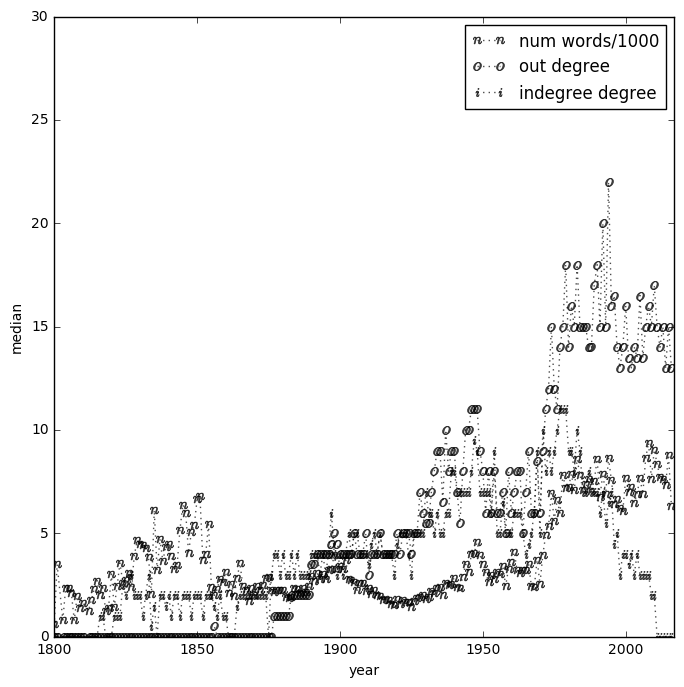

In [45]:
plt.figure(figsize=[8, 8])
plt.plot(nw_year_median.index, nw_year_median/1000,
            label='num words/1000', color='black', marker='$n$', alpha=.7, linewidth=1, linestyle=':')
plt.plot(od_year_median.index, od_year_median,
            label='out degree',  color='black', marker='$o$', alpha=.7, linestyle=':')
plt.plot(in_year_median.index, in_year_median,
            label='indegree degree',  color='black', marker='$i$', alpha=.7, linestyle=':')
plt.ylabel('median')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.xlim([1800, 2017])
plt.ylim([0, 30])


(0, 30)

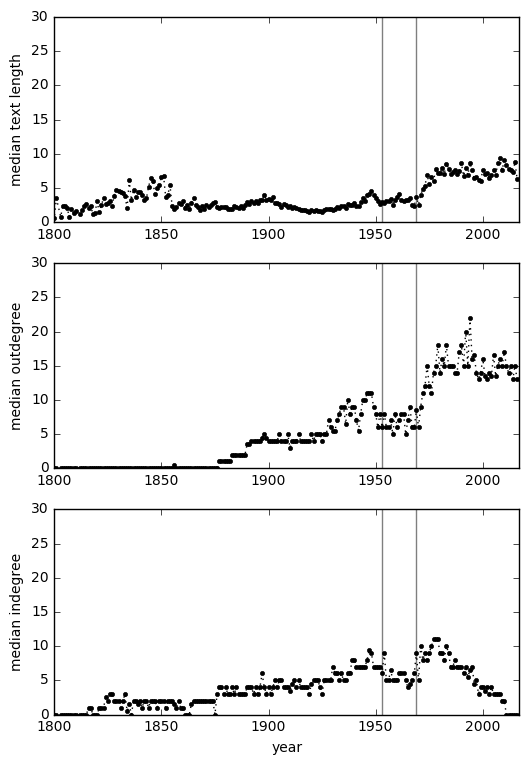

In [58]:
plt.figure(figsize=[6, 9])
plt.subplot(3,1,1)
plt.plot(nw_year_median.index, nw_year_median/1000,
         color='black', marker='.', linestyle=':')
plt.axvline(1953, color='black', alpha=.5)
plt.axvline(1969, color='black', alpha=.5)
plt.ylabel('median text length')
plt.xlim([1800, 2017])
plt.ylim([0, 30])

plt.subplot(3,1,2)
plt.plot(od_year_median.index, od_year_median,
         color='black', marker='.', linestyle=':')
plt.axvline(1953, color='black', alpha=.5)
plt.axvline(1969, color='black', alpha=.5)
plt.ylabel('median outdegree')
plt.xlim([1800, 2017])
plt.ylim([0, 30])

plt.subplot(3,1,3)
plt.plot(in_year_median.index, in_year_median,
         color='black', marker='.', linestyle=':')
plt.axvline(1953, color='black', alpha=.5)
plt.axvline(1969, color='black', alpha=.5)
plt.ylabel('median indegree')
plt.xlabel('year')
plt.xlim([1800, 2017])
plt.ylim([0, 30])




In [27]:
?plt.scatter

In [99]:
import networkx as nx

In [96]:
Gnx = nx.read_graphml(subnet_dir + network_name +'_network.graphml')

In [103]:
%%time
katz = nx.katz_centrality(Gnx)

CPU times: user 18.3 s, sys: 208 ms, total: 18.5 s
Wall time: 18.5 s
